<a href="https://colab.research.google.com/github/sandhyavisu/ML-MINOR-FEB/blob/main/MINIPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



STEP:1 **Gather** **Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


STEP:2 **Preprocess data**


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [ ]:


images=[]
target = []
flat_data = []

DATADIR = '/content/drive/MyDrive/pjt'
CATEGORIES = ['cow','cherry','chair'] # Name the folder with these categories

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #print(class_num) #label encoding the values
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)  
    img_resized = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images)



In [ ]:
flat_data

array([[0.65607516, 0.75164706, 0.87568301, ..., 0.25934641, 0.27981699,
        0.06805229],
       [0.54704035, 0.5768366 , 0.29371468, ..., 0.63437908, 0.67359477,
        0.32457516],
       [0.02745098, 0.05882353, 0.06666667, ..., 0.64181804, 0.62091608,
        0.23726667],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

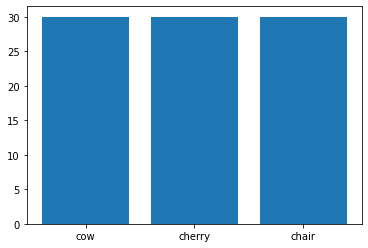

In [ ]:
unique,count= np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

STEP:3 **Apply any classification Algorithm with best parameters using GridSearch CV**


Splitting of data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=19)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(63,)
(27,)


HYPER PARAMETER TUNING OF SVM using gridsearchcv

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100]
}

grid = GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

Apply SVM Classifier-
Fit the model

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1,kernel='linear',probability=True)

model.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Predict the model

In [ ]:
y_pred = model.predict(x_test)

STEP:4 Evaluate the model using Confusion Matrix and classification report


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8518518518518519

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 4,  3,  0],
       [ 1,  7,  0],
       [ 0,  0, 12]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.70      0.88      0.78         8
           2       1.00      1.00      1.00        12

    accuracy                           0.85        27
   macro avg       0.83      0.82      0.81        27
weighted avg       0.86      0.85      0.85        27



STEP:5 5. Predict for any new Image

In [ ]:
# For saving the model in ML, use Pickle, Joblib
import pickle
pickle.dump(model,open('image_model.p','wb'))


In [ ]:
model=pickle.load(open('image_model.p','rb'))

enter ur urlhttps://images-na.ssl-images-amazon.com/images/I/311UE71HI0L._SX425_.jpg
(425, 425, 3)
predicted output:chair


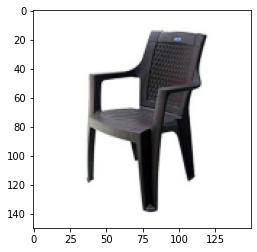

In [ ]:
#testing a brand new image
flat_data = []
url = input('enter ur url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'predicted output:{y_out}')



In [ ]:
!pip install ipykernel==4.1.1
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 92kB 5.5MB/s 
ERROR: ipywidgets 7.6.3 has requirement ipykernel>=4.5.1, but you'll have ipykernel 4.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 4.1.1 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 7.0MB 6.1MB/s 
     |████████████████████████████████| 112kB 56.3MB/s 
     |████████████████████████████████| 4.6MB 50.6MB/s 
     |████████████████████████████████| 163kB 53.7MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 122kB 49.3MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.2 which is incompatible.


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image


#st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('image classifier')
st.text('upload image')



model=pickle.load(open('image_model.p','rb'))



uploaded_file=st.file_uploader("choose an image",type="jpg")


if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='uploaded image')

  if st.button('predict'):
    st.write('result...')
    CATEGORIES=['cow','cherry','chair']
    flat_data=[]


    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    
    
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'predicted output:{y_out}')
    q=model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item}:{q[0][index]*100}%')



Writing app.py


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://d9035ff43942.ngrok.io'